# The Cancer Gene Atlas Cancer (TCGA) - Uterine Corpus Endometrial Carcinoma (UCEC)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.2
pandas 0.22.0
clustergrammer_widget 1.9.0
seaborn 0.8.1
Fri May 11 15:35:09 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Uterine Corpus Endometrial Carcinoma [UCEC]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-QF-A5YT,6766,UCEC,TCGA,E4BCCEA0-0104-40C4-9E3C-2AD7262D918E,QF,57.0,NaN,324,Nationwide Children's Hospital,NaN,...,50.5,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-QS-A744,6767,UCEC,TCGA,8E8F19BD-DBAA-4738-BAD2-207F634CD63D,QS,86.0,NaN,354,Nationwide Children's Hospital,NaN,...,28.6,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-4E-A92E,6768,UCEC,TCGA,B43DE98D-4BB1-41A1-91F2-CE4E7EA4D0CA,4E,54.0,NaN,381,Nationwide Children's Hospital,NaN,...,29.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-5B-A90C,6769,UCEC,TCGA,16AC4341-CF8F-45E2-B90B-2D12D5F74A59,5B,69.0,NaN,381,Nationwide Children's Hospital,NaN,...,39.3,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-5S-A9Q8,6770,UCEC,TCGA,8751429B-4A11-451E-B978-DC9E9DB0EB36,5S,51.0,NaN,421,Nationwide Children's Hospital,NaN,...,32.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(548, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_UCEC_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,c63d44f1-c9ad-4391-b1aa-0feb3713441b,30518eb4-2783-4988-bcd4-36a1a8bb4dfa,9e38e9bd-05fe-4257-b5ea-a23fc1d827d9,a4d2dd69-3e85-477b-8cac-fa2433f21de8,f8ce86d7-bdcd-4cf1-9cea-c5e074b71b76,b8cc9bd3-a926-43ce-9c7c-eefc561cd94d,0d9b9844-8365-4f99-9006-f6a52a58b24b,27d4a6dd-13eb-4cd0-85d3-9af281d94c7f,10f3a64a-149f-45ed-a38d-78a0413ad389,afd64ee8-ca44-45ab-b0cc-7d02e4bf5eb8,...,6e31ad8a-d526-47fe-981d-3beb39d2b2ef,dae2b475-c5f4-4894-bf59-41eee6c14bc7,25dae980-07e5-4092-9ea7-71205f95222f,94ec40b5-348e-4db8-95ac-54f5e248a9ba,4b09e15a-6393-4cad-8d8b-c153d416019a,b5012bbb-ae49-4b78-a17b-d34d9883e43e,dd6a889c-c53a-47d2-a7ec-c0e6082de5b7,2810adfd-0302-449a-a114-cef8acb43a5a,aa8d1dcd-d79e-4049-8e0d-df926673e07d,2d44e4f2-afea-4ae4-8d39-db7f7a6d7249
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,262.608000,146.2690,167.576000,100.753000,156.776000,323.096000,238.37800,267.242000,222.2820,181.420000,...,218.2490,210.556000,124.204000,321.3810,178.204000,207.508000,218.22400,329.2870,187.38900,338.840000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,30.089000,27.8511,21.653000,43.106400,30.628300,23.484800,8.41152,0.928408,24.3237,35.666900,...,29.0778,20.998000,48.089500,11.6787,21.033400,8.477060,8.00151,15.2356,1.99754,23.675900
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,9.797820,10.4452,9.772120,19.598600,22.602000,15.781300,11.38160,9.195120,18.3370,29.428400,...,14.9765,21.980600,12.191400,13.4800,11.299200,8.311650,13.62310,16.0188,6.15247,16.544600
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,82.082100,43.6565,44.843700,48.280100,48.595900,57.615500,37.44890,72.223900,54.3948,43.512900,...,68.3026,49.039800,49.261700,81.3030,35.190400,25.940900,57.70690,66.9621,20.22910,32.367600
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.039606,0.0000,0.072661,0.130537,0.550581,0.218198,0.00000,0.000000,0.0000,0.000019,...,0.0000,0.029126,0.558094,0.0000,0.729552,0.249971,0.00000,0.0000,0.00000,0.000006


In [19]:
matrix.shape

(199169, 593)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,c63d44f1-c9ad-4391-b1aa-0feb3713441b,30518eb4-2783-4988-bcd4-36a1a8bb4dfa,9e38e9bd-05fe-4257-b5ea-a23fc1d827d9,a4d2dd69-3e85-477b-8cac-fa2433f21de8,f8ce86d7-bdcd-4cf1-9cea-c5e074b71b76,b8cc9bd3-a926-43ce-9c7c-eefc561cd94d,0d9b9844-8365-4f99-9006-f6a52a58b24b,27d4a6dd-13eb-4cd0-85d3-9af281d94c7f,10f3a64a-149f-45ed-a38d-78a0413ad389,afd64ee8-ca44-45ab-b0cc-7d02e4bf5eb8,...,6e31ad8a-d526-47fe-981d-3beb39d2b2ef,dae2b475-c5f4-4894-bf59-41eee6c14bc7,25dae980-07e5-4092-9ea7-71205f95222f,94ec40b5-348e-4db8-95ac-54f5e248a9ba,4b09e15a-6393-4cad-8d8b-c153d416019a,b5012bbb-ae49-4b78-a17b-d34d9883e43e,dd6a889c-c53a-47d2-a7ec-c0e6082de5b7,2810adfd-0302-449a-a114-cef8acb43a5a,aa8d1dcd-d79e-4049-8e0d-df926673e07d,2d44e4f2-afea-4ae4-8d39-db7f7a6d7249
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,262.608000,146.2690,167.576000,100.753000,156.776000,323.096000,238.37800,267.242000,222.2820,181.420000,...,218.2490,210.556000,124.204000,321.3810,178.204000,207.508000,218.22400,329.2870,187.38900,338.840000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,30.089000,27.8511,21.653000,43.106400,30.628300,23.484800,8.41152,0.928408,24.3237,35.666900,...,29.0778,20.998000,48.089500,11.6787,21.033400,8.477060,8.00151,15.2356,1.99754,23.675900
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,9.797820,10.4452,9.772120,19.598600,22.602000,15.781300,11.38160,9.195120,18.3370,29.428400,...,14.9765,21.980600,12.191400,13.4800,11.299200,8.311650,13.62310,16.0188,6.15247,16.544600
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,82.082100,43.6565,44.843700,48.280100,48.595900,57.615500,37.44890,72.223900,54.3948,43.512900,...,68.3026,49.039800,49.261700,81.3030,35.190400,25.940900,57.70690,66.9621,20.22910,32.367600
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.039606,0.0000,0.072661,0.130537,0.550581,0.218198,0.00000,0.000000,0.0000,0.000019,...,0.0000,0.029126,0.558094,0.0000,0.729552,0.249971,0.00000,0.0000,0.00000,0.000006


In [22]:
matrix.shape

(79930, 593)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-EO-A22Y-01,TCGA-BK-A56F-01,TCGA-PG-A5BC-01,TCGA-EY-A54A-01,TCGA-AJ-A3NC-01,TCGA-AJ-A3OL-01,TCGA-AX-A3FT-01,TCGA-AX-A3G8-01,TCGA-EO-A3KW-01,TCGA-EY-A3QX-01,...,TCGA-AJ-A8CW-01,TCGA-AJ-A8CV-01,TCGA-4E-A92E-01,TCGA-2E-A9G8-01,TCGA-A5-AB3J-01,TCGA-5S-A9Q8-01,TCGA-JU-AAVI-01,TCGA-DI-A1BU-01,TCGA-AX-A05W-01,TCGA-B5-A0JR-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,262.608000,146.2690,167.576000,100.753000,156.776000,323.096000,238.37800,267.242000,222.2820,181.420000,...,218.2490,210.556000,124.204000,321.3810,178.204000,207.508000,218.22400,329.2870,187.38900,338.840000
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,30.089000,27.8511,21.653000,43.106400,30.628300,23.484800,8.41152,0.928408,24.3237,35.666900,...,29.0778,20.998000,48.089500,11.6787,21.033400,8.477060,8.00151,15.2356,1.99754,23.675900
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,9.797820,10.4452,9.772120,19.598600,22.602000,15.781300,11.38160,9.195120,18.3370,29.428400,...,14.9765,21.980600,12.191400,13.4800,11.299200,8.311650,13.62310,16.0188,6.15247,16.544600
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,82.082100,43.6565,44.843700,48.280100,48.595900,57.615500,37.44890,72.223900,54.3948,43.512900,...,68.3026,49.039800,49.261700,81.3030,35.190400,25.940900,57.70690,66.9621,20.22910,32.367600
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.039606,0.0000,0.072661,0.130537,0.550581,0.218198,0.00000,0.000000,0.0000,0.000019,...,0.0000,0.029126,0.558094,0.0000,0.729552,0.249971,0.00000,0.0000,0.00000,0.000006


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-EO-A22Y-01,TCGA-BK-A56F-01,TCGA-PG-A5BC-01,TCGA-EY-A54A-01,TCGA-AJ-A3NC-01,TCGA-AJ-A3OL-01,TCGA-AX-A3FT-01,TCGA-AX-A3G8-01,TCGA-EO-A3KW-01,TCGA-EY-A3QX-01,...,TCGA-AJ-A8CW-01,TCGA-AJ-A8CV-01,TCGA-4E-A92E-01,TCGA-2E-A9G8-01,TCGA-A5-AB3J-01,TCGA-5S-A9Q8-01,TCGA-JU-AAVI-01,TCGA-DI-A1BU-01,TCGA-AX-A05W-01,TCGA-B5-A0JR-01
ARF5,262.608000,146.2690,167.576000,100.753000,156.776000,323.096000,238.37800,267.242000,222.2820,181.420000,...,218.2490,210.556000,124.204000,321.3810,178.204000,207.508000,218.22400,329.2870,187.38900,338.840000
M6PR,30.089000,27.8511,21.653000,43.106400,30.628300,23.484800,8.41152,0.928408,24.3237,35.666900,...,29.0778,20.998000,48.089500,11.6787,21.033400,8.477060,8.00151,15.2356,1.99754,23.675900
ESRRA,9.797820,10.4452,9.772120,19.598600,22.602000,15.781300,11.38160,9.195120,18.3370,29.428400,...,14.9765,21.980600,12.191400,13.4800,11.299200,8.311650,13.62310,16.0188,6.15247,16.544600
FKBP4,82.082100,43.6565,44.843700,48.280100,48.595900,57.615500,37.44890,72.223900,54.3948,43.512900,...,68.3026,49.039800,49.261700,81.3030,35.190400,25.940900,57.70690,66.9621,20.22910,32.367600
CYP26B1,0.039606,0.0000,0.072661,0.130537,0.550581,0.218198,0.00000,0.000000,0.0000,0.000019,...,0.0000,0.029126,0.558094,0.0000,0.729552,0.249971,0.00000,0.0000,0.00000,0.000006


# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


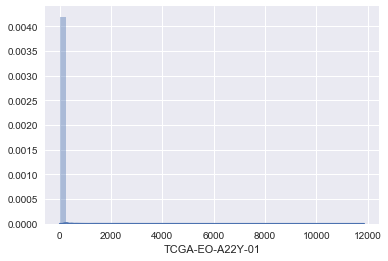

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


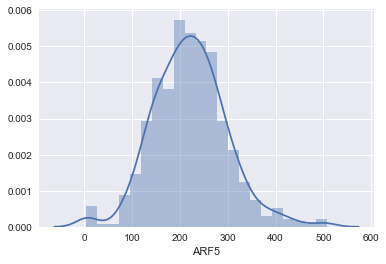

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_ucec_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining missing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-EO-A22Y-01,TCGA-BK-A56F-01,TCGA-PG-A5BC-01,TCGA-EY-A54A-01,TCGA-AJ-A3NC-01,TCGA-AJ-A3OL-01,TCGA-AX-A3FT-01,TCGA-AX-A3G8-01,TCGA-EO-A3KW-01,TCGA-EY-A3QX-01,...,TCGA-AJ-A8CW-01,TCGA-AJ-A8CV-01,TCGA-4E-A92E-01,TCGA-2E-A9G8-01,TCGA-A5-AB3J-01,TCGA-5S-A9Q8-01,TCGA-JU-AAVI-01,TCGA-DI-A1BU-01,TCGA-AX-A05W-01,TCGA-B5-A0JR-01
A1BG,0.198537,0.037767,0.179432,0.179432,0.179432,0.179432,0.179432,0.179432,0.179432,0.179432,...,0.179432,0.043787,0.179432,0.179432,0.179432,0.179432,0.021119,0.559804,0.179432,0.179432
A1CF,0.013399,0.007358,0.016494,0.037635,0.043659,0.020175,0.005888,0.005801,0.008142,0.002421,...,0.026855,0.024155,0.039491,0.005332,0.015264,0.007096,0.047977,0.039800,0.001908,0.006181
A2M,135.021000,135.956000,86.540100,117.015000,129.358000,29.783700,38.991500,9.551510,53.426500,30.982900,...,44.797400,76.547500,185.630000,56.179300,234.909000,30.635400,44.167600,67.173600,10.461800,50.755400
A2ML1,0.267053,0.432481,0.088979,0.102687,0.636987,1.984350,0.060354,0.774430,0.066388,0.135088,...,0.171191,0.238312,0.924225,0.099985,0.519086,0.201036,0.042115,0.121597,0.120090,0.227564
A3GALT2,0.070637,0.022642,0.024230,0.024365,0.023890,0.027008,0.070637,0.070637,0.034973,0.036884,...,0.070637,0.070637,0.070637,0.070637,0.019352,0.070637,0.070637,0.070637,0.070637,0.142802


In [34]:
normalized_matrix.shape

(19201, 593)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-EO-A22Y-01,TCGA-BK-A56F-01,TCGA-PG-A5BC-01,TCGA-EY-A54A-01,TCGA-AJ-A3NC-01,TCGA-AJ-A3OL-01,TCGA-AX-A3FT-01,TCGA-AX-A3G8-01,TCGA-EO-A3KW-01,TCGA-EY-A3QX-01,...,TCGA-AJ-A8CW-01,TCGA-AJ-A8CV-01,TCGA-4E-A92E-01,TCGA-2E-A9G8-01,TCGA-A5-AB3J-01,TCGA-5S-A9Q8-01,TCGA-JU-AAVI-01,TCGA-DI-A1BU-01,TCGA-AX-A05W-01,TCGA-B5-A0JR-01
A1BG,-0.512116,-1.233288,-0.542878,-0.561797,-0.569106,-0.550545,-0.538164,-0.536923,-0.534097,-0.507228,...,-0.532850,-1.146637,-0.533928,-0.522200,-0.555544,-0.543620,-1.443381,-0.071688,-0.578773,-0.556752
A1CF,-1.682901,-1.943640,-1.579450,-1.240104,-1.182932,-1.499632,-2.022062,-2.027305,-1.877292,-2.377202,...,-1.357730,-1.404980,-1.191330,-2.049185,-1.625788,-1.946499,-1.087031,-1.219839,-2.552095,-2.019607
A2M,2.320444,2.322999,2.140438,2.252544,2.288786,1.669533,1.798905,1.189248,1.939759,1.729993,...,1.864502,2.095945,2.480819,1.973476,2.561455,1.688703,1.877041,2.007474,1.186933,1.894830
A2ML1,-0.383360,-0.174432,-0.847493,-0.804182,-0.018877,0.493172,-1.011362,0.098158,-0.965906,-0.630512,...,-0.553270,-0.410840,0.177949,-0.776165,-0.094206,-0.494247,-1.143627,-0.734801,-0.753167,-0.453549
A3GALT2,-0.960925,-1.455492,-1.412422,-1.428924,-1.444800,-1.372961,-0.943032,-0.941792,-1.244264,-1.194293,...,-0.937718,-0.938953,-0.938796,-0.927068,-1.522712,-0.948488,-0.919030,-0.970692,-0.983641,-0.655918


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-EO-A22Y-01,TCGA-BK-A56F-01,TCGA-PG-A5BC-01,TCGA-EY-A54A-01,TCGA-AJ-A3NC-01,TCGA-AJ-A3OL-01,TCGA-AX-A3FT-01,TCGA-AX-A3G8-01,TCGA-EO-A3KW-01,TCGA-EY-A3QX-01,...,TCGA-AJ-A8CW-01,TCGA-AJ-A8CV-01,TCGA-4E-A92E-01,TCGA-2E-A9G8-01,TCGA-A5-AB3J-01,TCGA-5S-A9Q8-01,TCGA-JU-AAVI-01,TCGA-DI-A1BU-01,TCGA-AX-A05W-01,TCGA-B5-A0JR-01
A1BG,-0.524699,-1.211584,-0.592633,-0.596630,-0.530701,-0.550893,-0.431424,-0.180620,-0.431202,-0.452854,...,-0.481260,-1.054630,-0.627291,-0.412946,-0.613770,-0.522224,-1.262000,-0.051223,-0.275679,-0.447236
A1CF,-1.596492,-1.875064,-1.512884,-1.220686,-1.112199,-1.438833,-1.774658,-1.638024,-1.656668,-2.404543,...,-1.271098,-1.267543,-1.242590,-1.892446,-1.573115,-2.029740,-0.947520,-1.167878,-2.111112,-1.871966
A2M,2.276152,2.429014,2.104414,2.224134,2.361348,1.554066,1.873144,1.405196,1.863660,1.658384,...,1.779587,2.037607,2.439215,1.948358,2.658211,1.842583,1.925711,1.972521,1.560595,1.909163
A2ML1,-0.409288,-0.283803,-0.863165,-0.816670,-0.055796,0.326709,-0.893331,0.503229,-0.846964,-0.561603,...,-0.506554,-0.366933,-0.028814,-0.665317,-0.235438,-0.460896,-1.000319,-0.683472,-0.473329,-0.351622
A3GALT2,-0.933643,-1.412078,-1.374088,-1.387413,-1.342044,-1.320799,-0.825908,-0.661184,-1.086860,-1.078308,...,-0.884991,-0.872673,-0.990545,-0.819984,-1.470358,-0.977006,-0.786406,-0.925961,-0.743899,-0.546966


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-EO-A22Y-01,TCGA-BK-A56F-01,TCGA-PG-A5BC-01,TCGA-EY-A54A-01,TCGA-AJ-A3NC-01,TCGA-AJ-A3OL-01,TCGA-AX-A3FT-01,TCGA-AX-A3G8-01,TCGA-EO-A3KW-01,TCGA-EY-A3QX-01,...,TCGA-AJ-A8CW-01,TCGA-AJ-A8CV-01,TCGA-4E-A92E-01,TCGA-2E-A9G8-01,TCGA-A5-AB3J-01,TCGA-5S-A9Q8-01,TCGA-JU-AAVI-01,TCGA-DI-A1BU-01,TCGA-AX-A05W-01,TCGA-B5-A0JR-01
A1BG,0.063741,-5.896496,-0.525736,-0.560417,0.011663,-0.163544,0.873108,3.049387,0.875036,0.687160,...,0.440674,-4.534576,-0.826467,1.033445,-0.709144,0.085218,-6.333965,4.172189,2.224545,0.735904
A1CF,-0.038802,-0.652304,0.145330,0.788839,1.027761,0.308413,-0.431179,-0.130269,-0.171328,-1.818380,...,0.677817,0.685646,0.740599,-0.690583,0.012681,-0.992948,1.390436,0.905138,-1.172155,-0.645480
A2M,0.834503,1.330968,0.276732,0.665557,1.111202,-1.510687,-0.474386,-1.994183,-0.505189,-1.171882,...,-0.778240,0.059757,1.364098,-0.230107,2.075352,-0.573642,-0.303659,-0.151630,-1.489480,-0.357402
A2ML1,0.008044,0.241311,-0.835674,-0.749244,0.665156,1.376200,-0.891750,1.704337,-0.805557,-0.275095,...,-0.172764,0.086780,0.715314,-0.467891,0.331218,-0.087889,-1.090631,-0.501640,-0.111002,0.115241
A3GALT2,0.102510,-3.718066,-3.414695,-3.521103,-3.158811,-2.989157,0.962834,2.278246,-1.121016,-1.052721,...,0.491018,0.589391,-0.351888,1.010138,-4.183469,-0.243771,1.278279,0.163854,1.617725,3.190346


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(19201, 581)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18689, 581)

# Histogram of First Sample

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


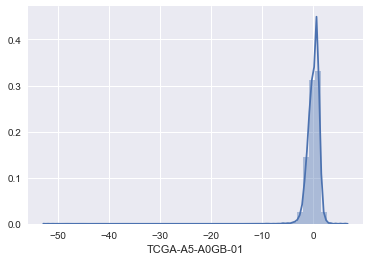

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


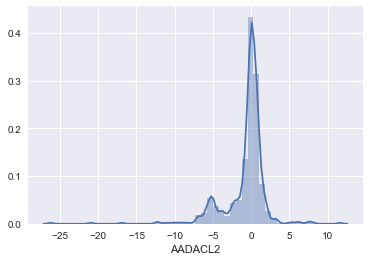

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_ucec_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18689, 2)

# Save Gene List

In [56]:
filename = path+'tcga_ucec_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-2E-A9G8-01,59,FEMALE,NaN,NaN,NaN,NaN,Endometrioid endometrial adenocarcinoma,Primary Solid Tumor,Endometrial,G2
TCGA-4E-A92E-01,54,FEMALE,NaN,NaN,NaN,NaN,Endometrioid endometrial adenocarcinoma,Primary Solid Tumor,Endometrial,G1
TCGA-5B-A90C-01,69,FEMALE,NaN,NaN,NaN,NaN,Endometrioid endometrial adenocarcinoma,Primary Solid Tumor,Endometrial,G2
TCGA-5S-A9Q8-01,51,FEMALE,NaN,NaN,NaN,NaN,Endometrioid endometrial adenocarcinoma,Primary Solid Tumor,Endometrial,G2
TCGA-A5-A0G1-01,67,FEMALE,NaN,NaN,NaN,NaN,Serous endometrial adenocarcinoma,Primary Solid Tumor,Endometrial,G3


In [60]:
attribute_list.shape

(581, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_ucec_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-2E-A9G8-01,TCGA-4E-A92E-01,TCGA-5B-A90C-01,TCGA-5S-A9Q8-01,TCGA-A5-A0G1-01,TCGA-A5-A0G2-01,TCGA-A5-A0G3-01,TCGA-A5-A0G5-01,TCGA-A5-A0G9-01,TCGA-A5-A0GA-01,...,TCGA-QF-A5YS-01,TCGA-QF-A5YT-01,TCGA-QS-A5YQ-01,TCGA-QS-A5YR-01,TCGA-QS-A744-01,TCGA-QS-A8F1-01,TCGA-SJ-A6ZI-01,TCGA-SJ-A6ZJ-01,TCGA-SL-A6J9-01,TCGA-SL-A6JA-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.704174,-0.565956,0.559489,0.074014,0.390754,0.742056,0.783403,0.883414,0.142844,0.318479,...,-0.985699,0.804075,-0.992568,0.480240,0.438927,0.897167,-0.872230,-0.672631,0.855816,0.845423
A1CF,-0.528579,0.528021,0.414394,-0.717825,-0.432236,0.438469,0.469450,0.803633,0.228535,-0.070949,...,-0.304938,-0.593950,-0.273962,0.008194,0.562472,-0.342799,0.200945,0.665822,-0.022765,0.724387
A2M,-0.163373,0.807572,-0.486782,-0.411073,-0.084189,-0.586549,-0.951279,0.611257,-0.331973,-0.011949,...,-0.762062,-0.524637,-0.180546,0.332324,0.745560,0.008713,0.387342,-0.008507,-0.596873,-0.940964
A2ML1,-0.371082,0.492856,0.499751,-0.047606,-0.959384,-0.921570,-0.326295,-0.728863,0.523860,0.713321,...,-0.388244,-0.770160,-0.040705,0.017799,0.245023,-0.938753,-0.701350,-0.649729,-0.340054,0.902886
A3GALT2,0.742003,-0.297653,0.686905,-0.204760,-0.572931,0.573210,0.935045,0.328753,0.511208,-0.769049,...,-0.947966,0.814370,0.669674,0.697220,-0.459370,0.779907,-0.555708,0.790256,0.879922,-0.886047


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

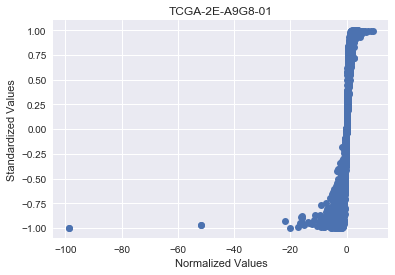

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_ucec_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-2E-A9G8-01,TCGA-4E-A92E-01,TCGA-5B-A90C-01,TCGA-5S-A9Q8-01,TCGA-A5-A0G1-01,TCGA-A5-A0G2-01,TCGA-A5-A0G3-01,TCGA-A5-A0G5-01,TCGA-A5-A0G9-01,TCGA-A5-A0GA-01,...,TCGA-QF-A5YS-01,TCGA-QF-A5YT-01,TCGA-QS-A5YQ-01,TCGA-QS-A5YR-01,TCGA-QS-A744-01,TCGA-QS-A8F1-01,TCGA-SJ-A6ZI-01,TCGA-SJ-A6ZJ-01,TCGA-SL-A6J9-01,TCGA-SL-A6JA-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,-1,0,-1,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_ucec_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_ucec_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_ucec_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_ucec_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_ucec_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-2E-A9G8, Age:59.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-4E-A92E, Age:54.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG1)","(Donor:TCGA-5B-A90C, Age:69.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-5S-A9Q8, Age:51.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-A5-A0G1, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)","(Donor:TCGA-A5-A0G2, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)","(Donor:TCGA-A5-A0G3, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)","(Donor:TCGA-A5-A0G5, Age:73.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)","(Donor:TCGA-A5-A0G9, Age:79.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)","(Donor:TCGA-A5-A0GA, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)",...,"(Donor:TCGA-QF-A5YS, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Mixed serous and endometrioid, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-QF-A5YT, Age:57.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG1)","(Donor:TCGA-QS-A5YQ, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG1)","(Donor:TCGA-QS-A5YR, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-QS-A744, Age:86.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-QS-A8F1, Age:85.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Serous endometrial adenocarcinoma, Tissue:Other Specify, Tumor:nan, GradeG3)","(Donor:TCGA-SJ-A6ZI, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG1)","(Donor:TCGA-SJ-A6ZJ, Age:61.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)","(Donor:TCGA-SL-A6J9, Age:73.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)","(Donor:TCGA-SL-A6JA, Age:77.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG3)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-2E-A9G8, Age:59.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Endometrioid endometrial adenocarcinoma, Tissue:Endometrial, Tumor:nan, GradeG2)",1.000000,-0.028695,0.085875,0.014281,0.008939,0.012112,0.078380,-0.041950,-0.025119,-0.020867,...,0.123760,0.078794,0.226316,0.123008,0.019516,0.061552,0.010981,0.098666,0.160566,0.046047
"

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_ucec_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

clustergrammer_widget(network='{"links": [], "views": [{"N_row_sum": "all", "dist": "cos", "nodes": {"row_node…

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.039923,-0.078915,-0.092041,0.050837,-0.042551,0.081414,-0.011943,-0.031936,0.053009,...,0.058769,0.079124,0.022368,0.026161,0.005826,0.010166,0.055656,-0.030407,-0.087430,0.037029
A1CF,0.039923,1.000000,-0.036923,-0.055545,-0.064681,-0.092783,0.090477,-0.027407,0.020667,0.032740,...,0.040630,0.014987,0.037464,0.026418,0.036079,0.001228,0.022352,-0.009895,-0.000403,0.074802
A2M,-0.078915,-0.036923,1.000000,-0.011513,-0.195025,0.169615,-0.106339,-0.214701,0.040236,-0.082733,...,-0.306834,-0.465134,0.142590,0.070581,-0.066795,-0.287315,0.238697,0.524649,0.154203,0.131532
A2ML1,-0.092041,-0.055545,-0.011513,1.000000,0.006827,0.121102,-0.023500,-0.090757,0.182255,-0.032577,...,-0.043473,0.024968,-0.026713,0.033311,0.042356,0.008394,-0.081292,-0.093346,0.124881,0.022615
A3GALT2,0.050837,-0.064681,-0.195025,0.006827,1.000000,-0.042381,0.086816,0.040077,-0.065444,0.070086,...,0.017545,0.143913,-0.114529,-0.105780,-0.083998,0.084328,-0.121298,-0.092275,0.070668,-0.130887


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_ucec_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_ucec_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  581 Out of 581   

 The number of statisticaly relevent gene-attribute associations is: 542785
